In [1]:
#case study Thurstan Green

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime



def human_format(num):
    num = float('{:.3g}'.format(num))
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '{}{}'.format('{:f}'.format(num).rstrip('0').rstrip('.'), ['', 'K', 'M', 'B', 'T'][magnitude])

sns.set()


wd = 'X:/Job Applications/2004o2casestudy/'

In [2]:
DF = pd.read_csv(wd + 'data_presentation_exercise1.txt'
                     ,sep='\t'
                     ,parse_dates=['delivery_timestamp']
                     )

In [3]:
DF['Time'] = [datetime.datetime.time(d) for d in DF['delivery_timestamp']] 
DF['Hour'] =DF['delivery_timestamp'].dt.hour
DF['Hour String'] =DF['delivery_timestamp'].dt.hour.astype(str)
DF['Dayofweek'] = DF['delivery_timestamp'].dt.weekday



In [4]:
DF['Delivery Saver'] = np.where((DF['delivery_saver']==1),'Delivery Saver','Not Delivery Saver') 

display(DF.groupby(['delivery_saver','Delivery Saver']).size())

delivery_saver  Delivery Saver    
0               Not Delivery Saver    7495
1               Delivery Saver        3239
dtype: int64

In [5]:
DF.head()

,customer_number,delivery_timestamp,Year_week_number,region_code,delivery_saver,sales_value,items,Time,Hour,Hour String,Dayofweek,Delivery Saver
0,42097,2018-10-17 11:00:00,201834,3,1,75.31,53,11:00:00,11,11,2,Delivery Saver
1,156156,2018-10-24 20:00:00,201835,8,0,121.65,69,20:00:00,20,20,2,Not Delivery Saver
2,82191,2018-05-10 16:00:00,201832,9,0,39.82,23,16:00:00,16,16,3,Not Delivery Saver
3,42607,2018-08-30 09:00:00,201827,3,0,97.60,67,09:00:00,9,9,3,Not Delivery Saver
4,67506,2018-09-23 19:00:00,201831,3,0,79.78,42,19:00:00,19,19,6,Not Delivery Saver


In [6]:
display(DF.columns)
display(DF.shape)

Index(['customer_number', 'delivery_timestamp', 'Year_week_number',
       'region_code', 'delivery_saver', 'sales_value', 'items', 'Time', 'Hour',
       'Hour String', 'Dayofweek', 'Delivery Saver'],
      dtype='object')

(10734, 12)

In [7]:
display(DF.dtypes)

customer_number                int64
delivery_timestamp    datetime64[ns]
Year_week_number               int64
region_code                    int64
delivery_saver                 int64
sales_value                  float64
items                          int64
Time                          object
Hour                           int64
Hour String                   object
Dayofweek                      int64
Delivery Saver                object
dtype: object

In [8]:
#clean any missing values as python don't calculate nulls
for y in DF.columns:
    if(DF[y].dtype == np.float64 or DF[y].dtype == np.int64):
          DF[y] = DF[y].fillna(0)
    else:
           DF[y] = DF[y].fillna('Missing')    
    

In [ ]:
#check the regions
checkregion = pd.pivot_table(data= DF
              ,values=['sales_value']
              ,index=['Year_week_number']
              ,columns=['region_code']
              ,aggfunc=np.count_nonzero
              ,fill_value=0)

checkregion.columns = checkregion.columns.droplevel(0)


display(checkregion)
display("week 32 has got no data in reigion 4,5,6")
display("there are a huge number of records in region 10 ")

del checkregion

In [ ]:
#check the regions
checkregion = pd.pivot_table(data= DF
              ,values=['items']
              ,index=['Year_week_number']
              ,columns=['region_code']
              ,aggfunc=np.count_nonzero
              ,fill_value=0)

checkregion.columns = checkregion.columns.droplevel(0)


display(checkregion)

del checkregion
#no items in week 32 either, so both items and value have been removed

In [ ]:
#check shape of number of items orders
a = pd.DataFrame(DF.groupby(['items']).size())

a.rename(columns={0:'Freq'}, inplace=True) #both rows and cols


# ax = a.plot(legend=False)
# ax.set_ylabel('Orders')            
# ax.grid(False)

# plt.title('2018 Q3 Items Distribution', weight='bold',  fontsize=12)

# plt.savefig(wd + 'itemsvscheckout.png',bbox_inches='tight')


del a


In [ ]:
#check shape of number of items orders

ax = DF.plot.scatter(x='items',y='sales_value',c='orange')

plt.title('2018 Q3 Items vs Checkout Value', weight='bold',  fontsize=12)
ax.grid(False)

plt.savefig(wd + 'itemsvscheckoutval.png',bbox_inches='tight')


In [ ]:
#check shape of number of items orders
a = pd.pivot_table(data=DF
                     ,values = ['customer_number']
                     ,index = ['items']
                     ,columns = ['region_code']
                     ,aggfunc=np.count_nonzero 
                     ,fill_value = 0)    

a.columns = a.columns.droplevel(0)



#display(a)

ax = a.plot()
ax.set_ylabel('Orders')            
ax.grid(False)

plt.title('2018 Q3 Items Distribution', weight='bold',  fontsize=12)

plt.savefig(wd + 'itemsvscheckout.png',bbox_inches='tight')




del a,ax

#shape is similar for all regions 

In [ ]:
#check cumlative percentage of orders 

a = pd.DataFrame(DF.groupby(['items'])['sales_value'].sum())


a['sales_cuml'] = a['sales_value'].cumsum()    
a['sales_cuml_perc'] = round(a['sales_value'].cumsum()/a['sales_value'].sum(),3)    

a['sales_cuml_perc'].plot(legend=False)

display(a[a['sales_cuml_perc']>=0.95])
display(a[a['sales_cuml_perc']>=0.99])
#the above display the 95 and 99 percentile 
del a

In [ ]:
#check the customers
checkcust1 = pd.pivot_table(data= DF
              ,values=['customer_number']
              ,index=['Year_week_number']
              ,columns=['region_code']
              ,aggfunc=np.count_nonzero
              ,fill_value=0)

#display(checkcust1)
#del checkcust

checkcust2 = pd.pivot_table(data= DF
              ,values=['customer_number']
              ,index=['Year_week_number']
              ,columns=['region_code']
              ,aggfunc=pd.Series.nunique
              ,fill_value=0)
#display(checkcust2)
#del checkcust

#ratio or order per customer
checkcust3 = round(checkcust1/checkcust2,1)
display(checkcust3)

del checkcust1,checkcust2,checkcust3

#display("totals are high as well")

In [ ]:
# #2.	Calculate and present the following metrics:
# a.	Total sales by week to customers in the sample
# b.	Total customers who placed an order during the quarter
# c.	Average order value
# d.	Average items per order


In [ ]:
#total sales  by week

totsales=  pd.DataFrame(DF.groupby(['Year_week_number'])['sales_value'].sum())

#a.rename(columns={0:'Freq'}, inplace=True) #both rows and cols


totsales.plot.bar(legend=False)

display(totsales)


del totsales

In [ ]:
#estimate for week32 

#check for weekly shifts by removing region 4/6

est = pd.pivot_table(data= DF
              ,values=['sales_value']
              ,index=['Year_week_number']
              ,columns=['region_code']
              ,aggfunc=np.sum
              ,fill_value=0)

est.columns = est.columns.droplevel(0)


est.drop([4,5,6],axis=1,inplace=True)

est['Total'] = est.sum(axis=1)

est


est_perc = est.apply(lambda x: round(x/x.sum(),5), axis=0)

est_perc['Total'].plot.bar()


est_perc = est_perc.append(est_perc.sum().rename('Total'))


display(est)
display(est_perc)


del est, est_perc

#0.08661

In [ ]:
#create estimate column and retotal
est = pd.pivot_table(data= DF
              ,values=['sales_value']
              ,index=['Year_week_number']
              ,columns=['region_code']
              ,aggfunc=np.sum
              ,fill_value=0
                    ,margins=True
                    ,margins_name='Total')

est.columns = est.columns.droplevel(0)


a = est[[4,5,6]].loc['Total':'Total'].T

rebase = 0.08661


a['Rebased Total'] = round(a['Total'] / (1-rebase),2)

a['201832'] = round(a['Rebased Total']*rebase,2)


a = a.append(a.sum().rename('Estimate'))
a = a.applymap("£{0:,.0f}".format)

display(a)

#a=pd.DataFrame(a['201832'].loc['Estimate':'Estimate']).T 

#display(a)



totsales=  pd.DataFrame(DF.groupby(['Year_week_number'])['sales_value'].sum())

totsales.rename( columns={'sales_value':'Recorded Sales'}, inplace=True) #just cols


#couldn't get a join to work 
totsales['Estimate'] = 0.0
totsales.loc[201832:201832,'Estimate':'Estimate']=17625.01
display(totsales)



ax = totsales.plot.bar(stacked=True, legend=True
                       ,color=['darkblue','cornflowerblue'])
ax.grid(False)

yval = ax.get_yticks()
ax.set_yticklabels(['£'+human_format(x) for x in ax.get_yticks()]) 

plt.legend(bbox_to_anchor=(1,1), edgecolor = 'white')
plt.title('2018 Q3 Weekly Sales', weight='bold',  fontsize=12)

#plt.show()
plt.savefig(wd + 'totalsaleswithestimate.png',bbox_inches='tight')

totsales['Total'] = totsales.sum(axis=1)
totsales = totsales.append(totsales.sum().rename('Total'))


totsales_out = totsales.div(1000)
totsales_out = totsales_out.applymap("£{0:.0f}K".format)
display(totsales_out)
del totsales,a




In [ ]:
#total customers who placed an order during the qtr



weeksshopped = (DF.groupby(['customer_number'])
            .agg({'Year_week_number': np.count_nonzero})) 

weeksshopped.rename( columns={'Year_week_number':'Orders'}, inplace=True) #just cols

weeksshopped['Num Orders'] = np.where(weeksshopped['Orders']<=9, weeksshopped['Orders'].astype(str),'9+')

display(weeksshopped)


a = pd.DataFrame(weeksshopped.groupby(['Num Orders']).size())

a.rename( columns={0:'Custs'}, inplace=True) #just cols

a['Percentage'] = (a['Custs']/a['Custs'].sum())
a = a.append(a.sum().rename('Total'))

a['Cumlative'] = a['Percentage'].cumsum()    


a['Custs'] = a['Custs'].astype(np.int)
a['Percentage'] = a['Percentage'].apply("{:,.1%}".format)

a['Cumlative'] = a['Cumlative'].apply("{:,.1%}".format)


display(a)

del weeksshopped,a

#so the missing data will be significant here. Is this the same by region

In [ ]:
#get anyone who only shopped in wk32 and show by region


weeksshopped = (DF.groupby(['customer_number'])
            .agg({'Year_week_number': np.count_nonzero})) 

weeksshopped.rename( columns={'Year_week_number':'Unique Weeks Shopped'}, inplace=True) #just cols

a= weeksshopped[weeksshopped['Unique Weeks Shopped']==1].index
display(a.shape)

b = DF[(DF['customer_number'].isin(a))]#&(DF['Year_week_number']==201832)]

display(b)

c= pd.pivot_table(data= b
              ,values=['customer_number']
              ,index=['Year_week_number']
              ,columns=['region_code']
              ,aggfunc=np.count_nonzero
              ,fill_value=0)



c.columns = c.columns.droplevel(0)

c = c.append(round(c.mean(),0).rename('Average'))
c= c.apply(lambda x: np.round(x,0).astype(np.int))


display(c)

del weeksshopped,a,b,c



In [ ]:

weeksshopped = (DF[DF['region_code'].isin([4,5,6])]
                .groupby(['customer_number'])
            .agg({'Year_week_number': pd.Series.nunique})) 

weeksshopped.rename( columns={'Year_week_number':'Unique Weeks Shopped'}, inplace=True) #just cols



a = pd.DataFrame(weeksshopped.groupby(['Unique Weeks Shopped']).size())

a.rename( columns={0:'Custs'}, inplace=True) #just cols


a['Cuml Percentage'] = round(a['Custs']/a['Custs'].sum() ,3)

a = a.append(a.sum().rename('Total'))

display(a)

del weeksshopped,a

In [ ]:

weeksshopped = (DF[~DF['region_code'].isin([4,5,6])]
                .groupby(['customer_number'])
            .agg({'Year_week_number': pd.Series.nunique})) 

weeksshopped.rename( columns={'Year_week_number':'Unique Weeks Shopped'}, inplace=True) #just cols



a = pd.DataFrame(weeksshopped.groupby(['Unique Weeks Shopped']).size())

a.rename( columns={0:'Custs'}, inplace=True) #just cols


a['Cuml Percentage'] = round(a['Custs']/a['Custs'].sum() ,3)

a = a.append(a.sum().rename('Total'))

display(a)

del weeksshopped,a

In [ ]:
#AOV + AIO

 
a = pd.DataFrame(DF.agg({'sales_value':np.mean,'items':np.mean})).T
a.rename(index={0:'Overall'}, inplace=True) #both rows and cols

b= DF.groupby('region_code').agg({'sales_value':np.mean,'items':np.mean})

b = b.append(a)

b = b.round(2)

b.rename( columns={'sales_value':'AOV', 'items':'AIO'}, inplace=True) #just cols

b['AOV'] = b['AOV'].apply("£{0:.2f}".format)


display(b)

del a,b


In [ ]:
#difference between delivery saver and not

display(DF.groupby('Delivery Saver').agg({'sales_value':[np.mean,np.count_nonzero],'items':np.mean}))

#overall not much


In [ ]:
#check how many customers had multiple delivery saver values 



cngprod = (DF.groupby(['customer_number'])
            .agg({'delivery_saver':pd.Series.nunique})) 
cngprod.rename( columns={'delivery_saver':'delsaverprods'}, inplace=True) #just cols

display(cngprod.groupby(['delsaverprods']).size())


cngprod = (list(cngprod[cngprod['delsaverprods']==2].index))
display(cngprod)

del cngprod

In [ ]:
#order frequency deliver saver should overindex

cngprod = (DF.groupby(['customer_number'])
            .agg({'delivery_saver':pd.Series.nunique})) 
cngprod.rename( columns={'delivery_saver':'delsaverprods'}, inplace=True) #just cols

display(cngprod.groupby(['delsaverprods']).size())

cngprod = (list(cngprod[cngprod['delsaverprods']==2].index))




a = (DF[~DF['customer_number'].isin(cngprod)]
         .groupby(['customer_number'])
            .agg({'Year_week_number': np.count_nonzero
                     ,'delivery_saver':np.max})) 

a.rename( columns={'Year_week_number':'Orders'}, inplace=True) #just cols

a['Num Orders'] = np.where(a['Orders']<=9, a['Orders'].astype(str),'9+')


a.reset_index(level=0, inplace=True)


display(a)

b = pd.pivot_table(a
              ,values=['customer_number']
              ,index=['Num Orders']
              ,columns=['delivery_saver']
              ,aggfunc=np.count_nonzero
              ,fill_value=0)

b.columns = b.columns.droplevel(0)
b.rename( columns={0:'Not Delivery Saver',1:'Delivery Saver'}, inplace=True) #just cols

b = b.append(b.sum().rename('Total'))

b['% Delivery Saver'] = b['Delivery Saver'] / (b['Not Delivery Saver']+b['Delivery Saver'])

b['% Delivery Saver'] = b['% Delivery Saver'].apply("{:,.1%}".format)

b = b.rename_axis(' ', axis='columns')

display(b)

del a,b,cngprod


In [ ]:
#see if there is a regional shift - this is at order level
a =  pd.pivot_table(data= DF
              ,values=['customer_number']
              ,index=['region_code']
              ,columns=['Delivery Saver']
              ,aggfunc=np.count_nonzero
              ,fill_value=0
              ,margins=True
                ,margins_name = 'Overall')

a.columns = a.columns.droplevel(0)


a['Delivery Saver %'] = round(a['Delivery Saver'] / a['Overall'],2)

display(a)

ax = a['Delivery Saver %'].plot.bar(legend=False,color='lightblue')

xcount = {}    #define dict for loading the heights, works with stacked as well
for i in ax.patches:
    
    if i.get_x() in xcount: #check if the x value is present and either add the height to current val or load
        xcount[i.get_x()] += i.get_height()
    else:
        xcount[i.get_x()] = i.get_height()
    
    if i.get_height() > 0.03:
        ax.text((i.get_x() + i.get_width()/2), #middle of the bar
                (xcount[i.get_x()]) - (i.get_height()/2) , #middle of the bar verically + the height of the bar if using stacked 
                str(int(round((i.get_height()*100),0))) +'%', #the value add text format here
                ha='center' #needed to align label centerally
                ,color = 'black'
                ,fontsize = 10
                ,rotation = 90 #if you want rotataion
                )

yval = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in yval])
ax.set_ylabel('% Orders')            
ax.grid(False)

plt.title('2018 Q3 % of orders via Delivery Saver', weight='bold',  fontsize=12)

plt.savefig(wd + 'deliverysaverperc.png',bbox_inches='tight')

#plt.show()        


del a

In [ ]:
#see if there is a regional shift - this is at order level
a =  pd.pivot_table(data= DF
              ,values=['customer_number']
              ,index=['Hour']
              ,columns=['Delivery Saver']
              ,aggfunc=np.count_nonzero
              ,fill_value=0
              ,margins=True
                ,margins_name = 'Overall')

a.columns = a.columns.droplevel(0)


a['Delivery Saver %'] = round(a['Delivery Saver'] / a['Overall'],2)

display(a)

ax = a['Delivery Saver %'].plot.bar(legend=False,color='lightgreen')

xcount = {}    #define dict for loading the heights, works with stacked as well
for i in ax.patches:
    
    if i.get_x() in xcount: #check if the x value is present and either add the height to current val or load
        xcount[i.get_x()] += i.get_height()
    else:
        xcount[i.get_x()] = i.get_height()
    
    if i.get_height() > 0.03:
        ax.text((i.get_x() + i.get_width()/2), #middle of the bar
                (xcount[i.get_x()]) - (i.get_height()/2) , #middle of the bar verically + the height of the bar if using stacked 
                str(int(round((i.get_height()*100),0))) +'%', #the value add text format here
                ha='center' #needed to align label centerally
                ,color = 'black'
                ,fontsize = 10
                ,rotation = 90 #if you want rotataion
                )

yval = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in yval])
ax.set_ylabel('% Orders')            
ax.grid(False)

plt.title('Delivery Saver vs Hour Items Delivered', weight='bold',  fontsize=12)

plt.savefig(wd + 'houritemsdelivered.png',bbox_inches='tight')

plt.show()        


del a

In [9]:
#try using a tree for multivariate 

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation



In [10]:
feature_cols = ['Year_week_number', 'region_code', 'sales_value', 'items','Hour','Dayofweek']

X = DF[feature_cols] # Features
y = DF['delivery_saver'] # Target variable

display(X)
display(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1) #went 50/50

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 5
                           , min_samples_leaf =20
                           ,max_leaf_nodes = 5 )

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)



print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


,Year_week_number,region_code,sales_value,items,Hour,Dayofweek
0,201834,3,75.31,53,11,2
1,201835,8,121.65,69,20,2
2,201832,9,39.82,23,16,3
3,201827,3,97.60,67,9,3
4,201831,3,79.78,42,19,6
...,...,...,...,...,...,...
10729,201831,11,132.82,122,14,5
10730,201828,9,113.39,59,8,0
10731,201831,2,159.50,88,19,2
10732,201832,1,53.32,35,13,1


0        1
1        0
2        0
3        0
4        0
        ..
10729    0
10730    0
10731    0
10732    0
10733    0
Name: delivery_saver, Length: 10734, dtype: int64

Accuracy: 0.6964784795975405


In [11]:
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

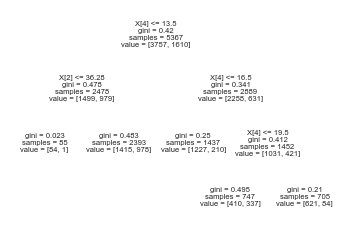

In [12]:
tree.plot_tree(clf)

plt.savefig(wd+'tempimage.png')

In [13]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
display(graph)
graph.write_png(wd+'t1.png')
#Image(graph.create_png())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


InvocationException: GraphViz's executables not found

In [ ]:
#day of week

aa = 'Delivery Saver'
bb = 'Not Delivery Saver'

a =DF[DF['Delivery Saver']==aa]['Dayofweek']
b= DF[DF['Delivery Saver']==bb]['Dayofweek']

#relative frequency
sns.distplot(a, bins=7, label = aa)
sns.distplot(b, bins=7, label = bb)
plt.legend(prop={'size': 12})
#plt.title('Dist of xx')
plt.xlabel('Day or Week')
plt.ylabel('Relative Frequency')
plt.show()





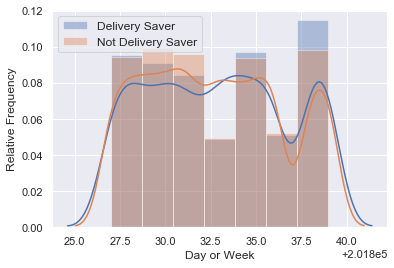

In [29]:
#day of week

aa = 'Delivery Saver'
bb = 'Not Delivery Saver'

a =DF[DF['Delivery Saver']==aa]['Year_week_number']
b= DF[DF['Delivery Saver']==bb]['Year_week_number']

#relative frequency
sns.distplot(a, bins=7, label = aa)
sns.distplot(b, bins=7, label = bb)
plt.legend(prop={'size': 12})
#plt.title('Dist of xx')
plt.xlabel('Day or Week')
plt.ylabel('Relative Frequency')
plt.show()

del a, b,aa,bb



In [33]:


a =  pd.pivot_table(data= DF
              ,values=['customer_number']
              ,index=['Year_week_number']
              ,columns=['Delivery Saver']
              ,aggfunc=np.count_nonzero
              ,fill_value=0
              ,margins=True
                ,margins_name = 'Total')

a.columns = a.columns.droplevel(0)

a['perc'] = a['Delivery Saver'] /a['Total']

display(a)

del a

Delivery Saver,Delivery Saver,Not Delivery Saver,Total,perc
Year_week_number,,,,
201827,253,582,835,0.302994
201828,278,632,910,0.305495
201829,239,635,874,0.273455
201830,266,638,904,0.294248
201831,261,689,950,0.274737
201832,208,548,756,0.275132
201833,272,634,906,0.300221
201834,280,589,869,0.322209
201835,260,618,878,0.296128


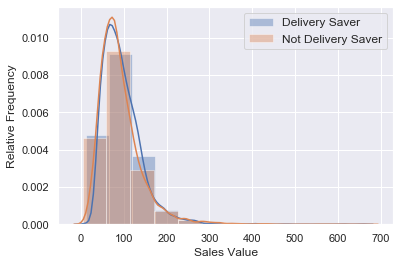

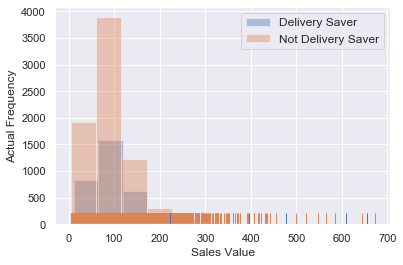

In [280]:
aa = 'Delivery Saver'
bb = 'Not Delivery Saver'

a =DF[DF['Delivery Saver']==aa]['sales_value']
b= DF[DF['Delivery Saver']==bb]['sales_value']

#relative frequency
sns.distplot(a, bins=12, label = aa)
sns.distplot(b, bins=12, label = bb)
plt.legend(prop={'size': 12})
#plt.title('Dist of xx')
plt.xlabel('Sales Value')
plt.ylabel('Relative Frequency')
plt.show()

#actual frequency
sns.distplot(a, bins=12, label = aa, kde=False, rug=True)
sns.distplot(b, bins=12, label = bb, kde=False, rug=True)
plt.legend(prop={'size': 12})
#plt.title('Dist of xx')
plt.xlabel('Sales Value')
plt.ylabel('Actual Frequency')
plt.show()

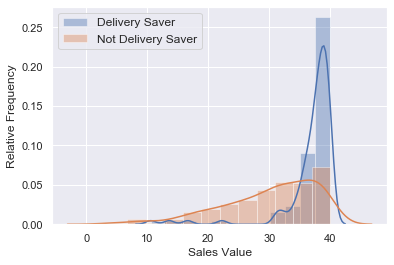

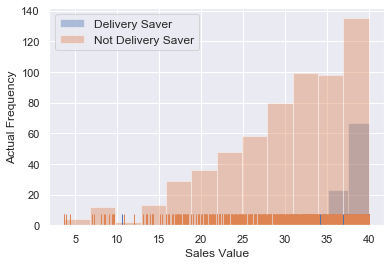

In [249]:
aa = 'Delivery Saver'
bb = 'Not Delivery Saver'

a =DF[(DF['Delivery Saver']==aa)&(DF['sales_value']<=40)]['sales_value']
b= DF[(DF['Delivery Saver']==bb)&(DF['sales_value']<=40)]['sales_value']

#relative frequency
sns.distplot(a, bins=12, label = aa)
sns.distplot(b, bins=12, label = bb)
plt.legend(prop={'size': 12})
#plt.title('Dist of xx')
plt.xlabel('Sales Value')
plt.ylabel('Relative Frequency')
plt.show()

#actual frequency
sns.distplot(a, bins=12, label = aa, kde=False, rug=True)
sns.distplot(b, bins=12, label = bb, kde=False, rug=True)
plt.legend(prop={'size': 12})
#plt.title('Dist of xx')
plt.xlabel('Sales Value')
plt.ylabel('Actual Frequency')
plt.show()

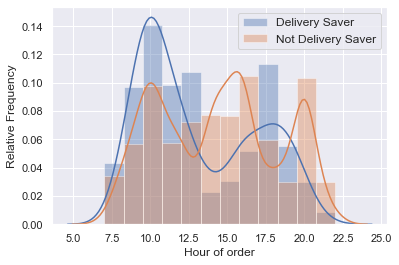

In [250]:
aa = 'Delivery Saver'
bb = 'Not Delivery Saver'

a =DF[DF['Delivery Saver']==aa]['Hour']
b= DF[DF['Delivery Saver']==bb]['Hour']

#relative frequency
sns.distplot(a, bins=12, label = aa)
sns.distplot(b, bins=12, label = bb)
plt.legend(prop={'size': 12})
#plt.title('Dist of xx')
plt.xlabel('Hour of order')
plt.ylabel('Relative Frequency')
plt.show()


In [14]:
#junk below this 